In [858]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from pandas import json_normalize
import json
import random

In [859]:
spotify_1 = pd.read_csv('/Users/amelia/Desktop/Bootcamp/MSDS593DataVis/final/Most Streamed Spotify Songs 2024.csv',encoding='ISO-8859-1', sep = ',')
pd.set_option('display.max_columns', None)
spotify_1.head(10)
# first look at the data. what is the ý character?
# we have 29 variables 
#this is some sort of missing value which we should probably drop
#there are also repeat tracks which we should filter out
#why does spotify playlist count = 1?

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",83.0,"131,148,091","1,392,593","4,202,367","214,943,489","2,938,686,633","2,867,222,632",138.0,"522,042","4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",86.0,"308,723,145","4,120,760",NaN,"29,584,940","534,915,313","4,601,579,812",280.0,"383,478",429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",92.0,"228,382,568","1,439,495","3,500,000","338,546,668","3,804,584,163","2,112,581,620",160.0,"17,221",30,87.0,"33,245,595",53.0,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",86.0,"32,735,244","988,682","325,800","121,574,500","974,656,200","174,706,874",191.0,"3,823",117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",NaN,1


In [860]:
# all the odd null value characters are removed
spotify_1 = spotify_1[~spotify_1['Album Name'].str.contains('ý')]
spotify_1['Artist'] = spotify_1['Artist'].str.replace('¿', '')
spotify_1['Artist'] = spotify_1['Artist'].str.replace('ï', '')
spotify_1['Artist'] = spotify_1['Artist'].str.replace('ý', '')


#remove all duplicate titles
spotify_1 = spotify_1.drop_duplicates(subset=['Track'])


In [861]:
#release date could be datetime, make strs into ints
spotify_1['Release Date'] = pd.to_datetime(spotify_1['Release Date'])

#extract release month
spotify_1['MonthRelease'] = spotify_1['Release Date'].dt.to_period('M')

# remove commas 
spotify_1['All Time Rank'] = spotify_1['All Time Rank'].str.replace(',', '', regex=True)
spotify_1['Spotify Streams'] = spotify_1['Spotify Streams'].str.replace(',', '', regex=True)
spotify_1['Spotify Playlist Reach'] = spotify_1['Spotify Playlist Reach'].str.replace(',', '', regex=True)
spotify_1['Spotify Playlist Count'] = spotify_1['Spotify Playlist Count'].str.replace(',', '', regex=True)
spotify_1['YouTube Views'] = spotify_1['YouTube Views'].str.replace(',', '', regex=True)
spotify_1['TikTok Views'] = spotify_1['TikTok Views'].str.replace(',', '', regex=True)
spotify_1['Pandora Streams'] = spotify_1['Pandora Streams'].str.replace(',', '', regex=True)
spotify_1['AirPlay Spins'] = spotify_1['AirPlay Spins'].str.replace(',', '', regex=True)
spotify_1['Soundcloud Streams'] = spotify_1['Soundcloud Streams'].str.replace(',', '', regex=True)

#make numeric
spotify_1['All Time Rank'] = spotify_1['All Time Rank'].astype(int)
spotify_1['Spotify Streams'] = spotify_1['Spotify Streams'].astype(float)
spotify_1['Spotify Playlist Reach'] = spotify_1['Spotify Playlist Reach'].astype(float)
spotify_1['Spotify Playlist Count'] = spotify_1['Spotify Playlist Count'].astype(float)
spotify_1['YouTube Views'] = spotify_1['YouTube Views'].astype(float)
spotify_1['TikTok Views'] = spotify_1['TikTok Views'].astype(float)
spotify_1['Pandora Streams'] = spotify_1['Pandora Streams'].astype(float)
spotify_1['AirPlay Spins'] = spotify_1['AirPlay Spins'].astype(float)
spotify_1['Soundcloud Streams'] = spotify_1['Soundcloud Streams'].astype(float)


# add total stream variable, skip missing vals
spotify_1['TotalStreams'] = spotify_1[['Spotify Streams','YouTube Views','TikTok Views','Pandora Streams','AirPlay Spins','Soundcloud Streams']].sum(axis=1, skipna=True)

#check date range
spotify_1['Spotify Streams'].sum()
spotify_1['TikTok Views'].sum()
spotify_1['YouTube Views'].sum()
spotify_1['Pandora Streams'].sum()
spotify_1['Soundcloud Streams'].sum()/1000000000


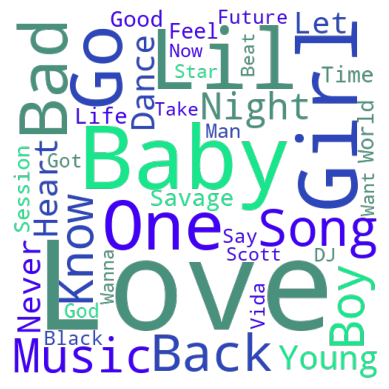

In [862]:
#gather all text data from the titles of the songs
title_text = spotify_1['Track'].str.cat(sep= ' ')
title_text = title_text.replace('ý','')
title_text = title_text.replace(('ï'),'')
title_text = title_text.replace('1/2','') 
title_text = title_text.replace('½','')

additional_stopwords = STOPWORDS.union({'de', 'la', 'el', 'en', 'edit', 'Drake', 'cover', 'ya', 'un', 'mi', 'sped', 'da', 'feat','bzrp','p','x','E','T','l','n','u','j','b','tu','lo','si','se','m','y','o','s','remix','vol','version','que','te'}) 
# remove stop words in a different language and words that describe the song (such as version, feat., or remix)
#wordcloud already has some stopwords but the first version was very messy

#our color palette
color_palette = [ '#2d46b9ff', '#4100f5', '#4a917d', '#19e58cff']

#create custom color palette with random assignment
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(color_palette)



#generate wordcloud
wordcloud = WordCloud(background_color=None, mode='RGBA',width=500, height=500, max_words=40, collocations = False, stopwords = additional_stopwords).generate(title_text)
wordcloud.generate(title_text)

# color word cloud
colored_cloud = wordcloud.recolor(color_func=color_func)

plt.imshow(colored_cloud)
plt.axis("off")
# plt.savefig('transparent_wordcloud1.png', dpi=300, format='png', transparent=True, bbox_inches='tight', pad_inches=0)
# plt.close()
plt.show()

In [863]:
#normalize streaming a reach data for more appealing visuals
def normalize(spotify_1,col):
    x = (spotify_1[col] - spotify_1[col].min()) / \
                          (spotify_1[col].max() - spotify_1[col].min())
    return x
spotify_1['Normalized Spotify Playlist Reach'] = normalize(spotify_1, 'Spotify Playlist Reach')
spotify_1['Normalized Spotify Streams'] = normalize(spotify_1, 'Spotify Streams')
spotify_1['Normalized Total Streams'] = normalize(spotify_1, 'TotalStreams')
spotify_1['Normalized Spotify Playlist Count'] = normalize(spotify_1, 'Spotify Playlist Count')

#from notebook: make color scheme based on quantiles
#color_palette = [ '#2d46b9ff', '#4100f5', '#4a917d', '#19e58cff']
def conditions_color(df):
    if df['Spotify Popularity'] < 62:
        return '#0c52eb'
    elif (df['Spotify Popularity'] >= 62)& (df['Spotify Popularity'] < 67):
        return '#00f7ef'
    elif (df['Spotify Popularity'] >= 67)& (df['Spotify Popularity'] < 73):
        return '#2d46b9ff'
    else:
        return '#19e58cff'

def conditions_label(df):
    if df['Spotify Popularity'] < 62:
        return '0%-25% Spotify ranking'
    elif (df['Spotify Popularity'] >= 62)& (df['Spotify Popularity'] < 67):
        return '25%-50% Spotify ranking'
    elif (df['Spotify Popularity'] >= 67)& (df['Spotify Popularity'] < 73):
        return '50%-75% Spotify ranking'
    else:
        return '75%-100% Spotify ranking'

    
#define a new column storing the colors
spotify_1['Color'] = spotify_1.apply(conditions_color, axis=1)
spotify_1['Label'] = spotify_1.apply(conditions_label, axis=1)

#seperate data by population size
df_1 = spotify_1[spotify_1['Label']=='0%-25% Spotify ranking']
df_2 = spotify_1[spotify_1['Label']=='25%-50% Spotify ranking']
df_3 = spotify_1[spotify_1['Label']=='50%-75% Spotify ranking']
df_4 = spotify_1[spotify_1['Label']=='75%-100% Spotify ranking']

#pick out our interesting songs
dot_1 = spotify_1[spotify_1['Spotify Popularity']==spotify_1['Spotify Popularity'].max()]
dot_2 = spotify_1[spotify_1['Spotify Streams']==spotify_1['Spotify Streams'].max()]
dot_3 = spotify_1[spotify_1['TotalStreams']==spotify_1['TotalStreams'].max()]
dot_4 = spotify_1[spotify_1['YouTube Views'] == spotify_1['YouTube Views'].max()]


/var/folders/xv/bhy5j8553dl9xk5vtpmqxw800000gn/T/ipykernel_75104/828960592.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(range(0, 7))
/var/folders/xv/bhy5j8553dl9xk5vtpmqxw800000gn/T/ipykernel_75104/828960592.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(r, size = 10)
/var/folders/xv/bhy5j8553dl9xk5vtpmqxw800000gn/T/ipykernel_75104/828960592.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(range(0, 5))
/var/folders/xv/bhy5j8553dl9xk5vtpmqxw800000gn/T/ipykernel_75104/828960592.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(s, size = 10)


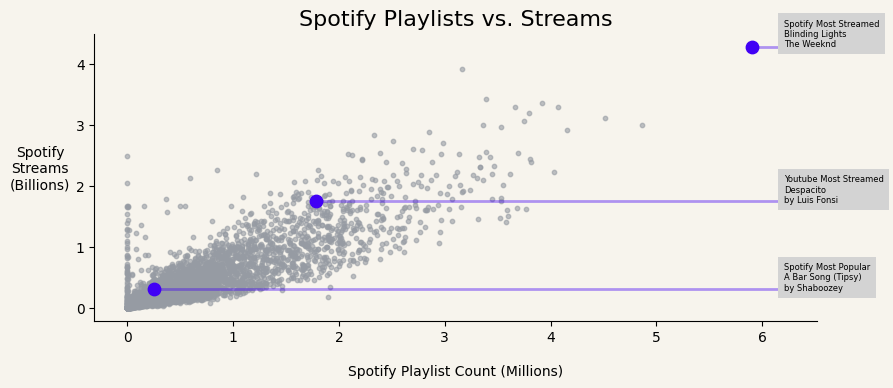

In [943]:
#start plot
fig, ax = plt.subplots(figsize=(9.32, 3.73))

#define x and y (normalized columns)
# x = (spotify_1['Spotify Playlist Reach'] - spotify_1['Spotify Playlist Reach'].min()) / \
#                           (spotify_1['Spotify Playlist Reach'].max() - spotify_1['Spotify Playlist Reach'].min())
                          
                          
# y = (spotify_1['Spotify Streams'] - spotify_1['Spotify Streams'].min()) / \
#                           (spotify_1['Spotify Streams'].max() - spotify_1['Spotify Streams'].min())


#transformation?
# x = np.sqrt(x)
# y = np.sqrt(y)
# scatter = ax.scatter(x, y, c=spotify_1['Spotify Popularity'], cmap='plasma', s=1)


#Scatter plot for each population size to generate legend
ax.scatter(df_1['Spotify Playlist Count'], df_1['Spotify Streams'], c='#969ba3', s=10, alpha=0.6, label = '0%-25% Spotify ranking')
ax.scatter(df_2['Spotify Playlist Count'], df_2['Spotify Streams'], c='#969ba3', s=10, alpha=0.6, label = '25%-50% Spotify ranking')
ax.scatter(df_3['Spotify Playlist Count'], df_3['Spotify Streams'], c='#969ba3', s=10, alpha=0.6, label = '50%-75% Spotify ranking')
ax.scatter(df_4['Spotify Playlist Count'], df_4['Spotify Streams'], c='#969ba3', s=10, alpha=0.6, label = '75%-100% Spotify ranking')
d1x = dot_1['Spotify Playlist Count'].iloc[0]
d1y = dot_1['Spotify Streams'].iloc[0]
d2x = dot_2['Spotify Playlist Count'].iloc[0]
d2y = dot_2['Spotify Streams'].iloc[0]
d3x = dot_3['Spotify Playlist Count'].iloc[0]
d3y = dot_3['Spotify Streams'].iloc[0]
d4x = dot_4['Spotify Playlist Count'].iloc[0]
d4y = dot_4['Spotify Streams'].iloc[0]



# Add title, xlabel and ylabel
ax.set_xlabel('Spotify Playlist Count (Millions)')
ax.set_ylabel('Spotify\nStreams\n(Billions)',rotation=0)
ax.set_title('Spotify Playlists vs. Streams', fontsize=16)

# set x label position to bottom left
ax.xaxis.set_label_coords(0.5, -0.15) 
# set y label position to top right
ax.yaxis.set_label_coords(-0.075, 0.45)

#mark the most notable songs
ax.scatter(dot_1['Spotify Playlist Count'], dot_1['Spotify Streams'], s=80, c='#4100f5')
ax.scatter(dot_2['Spotify Playlist Count'], dot_2['Spotify Streams'], s=80, c='#4100f5')
# ax.scatter(dot_3['Spotify Playlist Count'], dot_3['Spotify Streams'], s=50, c='#19e58cff')
ax.scatter(dot_4['Spotify Playlist Count'], dot_4['Spotify Streams'], s=80, c='#4100f5')

#offsets
x_offset = 30000
y_offset = 20000000

#clean up ticks
r = [None, '0', '1', "2", "3", "4", "5", "6", "7"]
ax.set_xticklabels(range(0, 7))
ax.set_xticklabels(r, size = 10)

s = [None, '0', '1', "2", "3", "4", '5']
ax.set_yticklabels(range(0, 5))
ax.set_yticklabels(s, size = 10)

#add text explaining notable songs
set1 = dict(facecolor='lightgrey', edgecolor='none')

ax.text(d2x+x_offset,d2y,'Spotify Most Streamed\nBlinding Lights\nThe Weeknd',fontsize=6,bbox=set1)
ax.hlines(y=d2y,xmin=d2x+x_offset,xmax=d2x,color='#4100f5',linewidth=2,alpha=0.4)

ax.text(d2x+x_offset,d1y-y_offset,'Spotify Most Popular\nA Bar Song (Tipsy)\nby Shaboozey',fontsize=6,bbox=set1)
ax.hlines(y=d1y,xmin=d2x+x_offset,xmax=d1x,color='#4100f5',linewidth=2,alpha=0.4)

ax.text(d2x+x_offset,d4y-y_offset,'Youtube Most Streamed\nDespacito\nby Luis Fonsi',fontsize=6,bbox=set1)
ax.hlines(y=d4y,xmin=d2x+x_offset,xmax=d4x,color='#4100f5',linewidth=2,alpha=0.4)

#change background color
ax.set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor('#f7f4ed')

#remove border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig("playlist_streams.png", format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()


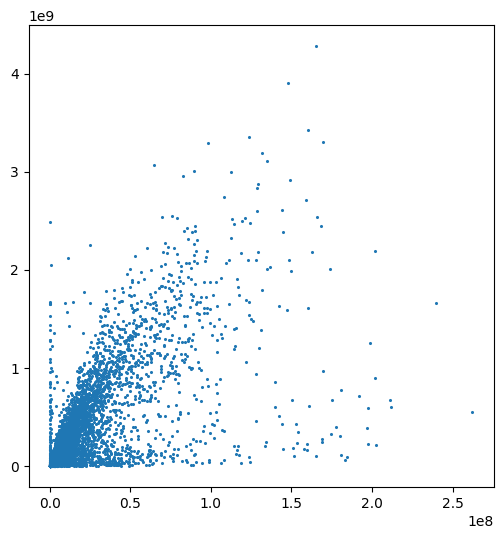

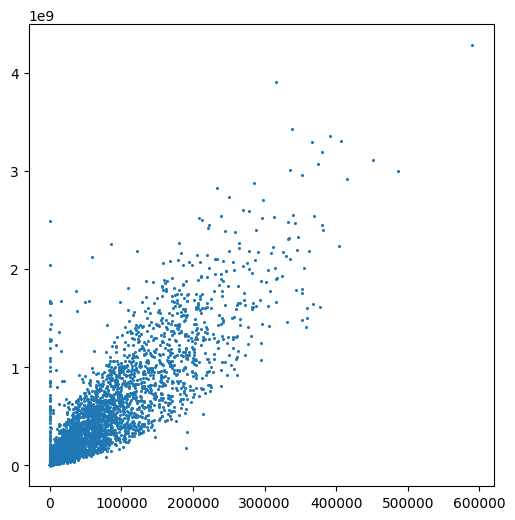

In [866]:
#playlist reach compared to streams
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(spotify_1['Spotify Playlist Reach'], spotify_1['Spotify Streams'], s=1.5) # size = 1.5 per dot
plt.show()

#playlist count compared to streams
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(spotify_1['Spotify Playlist Count'], spotify_1['Spotify Streams'], s=1.5) # size = 1.5 per dot
plt.show()

In [867]:
#songs put in the fewest amount of playlists 
spotify_2 = spotify_1.dropna(axis=0, subset='Spotify Playlist Count')

point = spotify_2[spotify_2['Spotify Playlist Count']==spotify_2['Spotify Playlist Count'].min()]
point

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,MonthRelease,TotalStreams,Normalized Spotify Playlist Reach,Normalized Spotify Streams,Normalized Total Streams,Normalized Spotify Playlist Count,Color,Label
24,Future,Future,official sound studio,2024-01-10,RUA1H2415548,25,277.5,NaN,1.0,2.0,NaN,NaN,NaN,"9,453,333","273,236,305",4.306270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2024-01,4.306270e+09,3.811798e-09,NaN,0.018462,0.0,#19e58cff,75%-100% Spotify ranking
141,Jedag Jedug Capcut 2024,Jedag Jedug Capcut 2024,Afrian Af,2024-01-05,ATR981312465,142,127.4,NaN,1.0,47.0,NaN,NaN,NaN,"3,528,100","37,591,836",6.883020e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2024-01,6.883020e+08,1.753427e-07,NaN,0.002951,0.0,#19e58cff,75%-100% Spotify ranking
286,Breakeven,Breakeven (Official 4K Video),The Script,2024-04-25,GB1102400418,287,91.1,8.589795e+08,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2024-04,8.589795e+08,4.955337e-08,2.006271e-01,0.003683,0.0,#19e58cff,75%-100% Spotify ranking
557,Broccoli,Broccoli - Single,ati2x06,2024-01-17,ES64E2455101,626,64.9,8.464359e+08,1.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2024-01,8.464359e+08,1.562837e-07,1.976974e-01,0.003629,0.0,#19e58cff,75%-100% Spotify ranking
624,Building Blocks,Darkly,Falls,2022-07-15,QZN882241742,619,61.1,NaN,1.0,4.0,NaN,1.067013e+09,"2,057,980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-07,1.067013e+09,1.143539e-08,NaN,0.004574,0.0,#19e58cff,75%-100% Spotify ranking
879,BAND4BAND,BAND4BAND (Official Video),Central Cee,2024-06-06,USSM22401074,874,51.6,8.614447e+07,1.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2024-06,8.614447e+07,8.767135e-08,2.012006e-02,0.000369,0.0,#19e58cff,75%-100% Spotify ranking
911,Raja Ji Ke Dilwa,Raja Ji Ke Dilwa,Pawan Singh,2023-12-19,INM1Q2326022,909,50.6,4.283000e+03,1.0,3.0,NaN,2.248199e+08,"1,249,285",NaN,NaN,NaN,"29,757,537",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-12,2.248242e+08,7.623595e-09,7.502100e-07,0.000964,0.0,#19e58cff,75%-100% Spotify ranking
993,Calm Down Baby,Calm Down Baby - Single,DJ Laxman,2024-01-12,FR10S2458617,989,48.4,1.389773e+09,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2024-01,1.389773e+09,0.000000e+00,3.246017e-01,0.005958,0.0,#19e58cff,75%-100% Spotify ranking
1096,Hei Apa Apa / Tik Tak Tik Tik,Nuansa Angkot 2023 - Vol. 1,Donny Fernanda,2023-02-14,FR59R2347368,1092,45.9,1.241500e+04,1.0,2.0,NaN,NaN,NaN,"3,817,700","148,462,808",2.586058e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-02,2.586070e+09,3.811798e-09,2.649559e-06,0.011087,0.0,#19e58cff,75%-100% Spotify ranking
1465,Popular,Popular,The Weeknd,2024-02-22,USUMV2302771,1459,38.4,8.115456e+08,1.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2024-02,8.115456e+08,2.439550e-07,1.895482e-01,0.003479,0.0,#19e58cff,75%-100% Spotify ranking


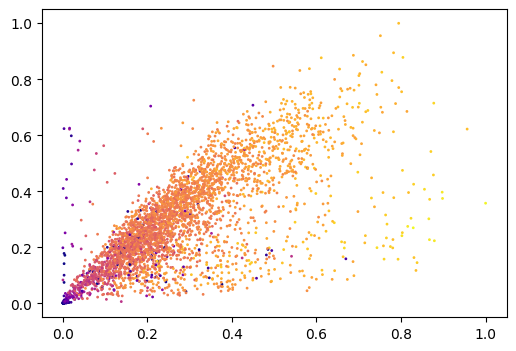

In [868]:
#ALTERNATIVE PLOT: square root transformation

#start plot
fig, ax = plt.subplots(figsize=(6,4))

# define x and y (normalized columns)
x = (spotify_1['Spotify Playlist Reach'] - spotify_1['Spotify Playlist Reach'].min()) / \
                          (spotify_1['Spotify Playlist Reach'].max() - spotify_1['Spotify Playlist Reach'].min())
                          
                          
y = (spotify_1['Spotify Streams'] - spotify_1['Spotify Streams'].min()) / \
                          (spotify_1['Spotify Streams'].max() - spotify_1['Spotify Streams'].min())


# transformation?
x = np.sqrt(x)
y = np.sqrt(y)
scatter = ax.scatter(x, y, c=spotify_1['Spotify Popularity'], cmap='plasma', s=1)


In [869]:
#including my own data: reading it in!
with open('/Users/amelia/Desktop/Bootcamp/MSDS593DataVis/final/Spotify Account Data/StreamingHistory_music_0.json') as f:
    data = json.load(f)
streaming0 = json_normalize(data)

#create datetime column for when i finished listening
streaming0['endTime'] = pd.to_datetime(streaming0['endTime'], format = '%Y-%m-%d %H:%M')

#convert milliseconds played into minutes
streaming0['MinPlayed'] = (streaming0['msPlayed']*0.001)/60
streaming0['StreamCount'] = 1

#make a new dataframe with only one entry for each song, 
# endtime = my first listen
# streamcount = number of time i listened
# minplayed = total streaming time
uniquedata = streaming0[['endTime','trackName','artistName', 'MinPlayed', 'StreamCount']]
uniquedata = uniquedata.groupby('trackName', as_index=False).agg({
    'artistName': 'first',
    'endTime': 'min',
    'MinPlayed': 'sum',
    'StreamCount': 'sum'
    
})

#sort the dataframe to rank by most minutes listened
uniquedata = uniquedata.sort_values(by = 'MinPlayed', ascending = False).reset_index(drop=True)
uniquedata = uniquedata[uniquedata['artistName']!='Cigarettes After Sex'].reset_index(drop=True)

#add a column to store the index as MY ranking
uniquedata['MyRanking'] = uniquedata.index.values
uniquedata = uniquedata.copy()

#check out overlap between my data and the most popular songs
overlapd1 = spotify_1[spotify_1['Track'].isin(uniquedata['trackName'])].copy()

#now lets merge the two by adding my own data
overlapd1 = overlapd1.merge(
    uniquedata[['trackName', 'MyRanking', 'MinPlayed', 'endTime', 'StreamCount']],
    left_on = 'Track', right_on = 'trackName',
    how = 'left'
)
overlapd1 = overlapd1[overlapd1['Artist'] != 'Imagine Dragons']
overlapd1.head()

#make column with difference in rank
overlapd1['Ranking Difference'] = overlapd1['All Time Rank'] - overlapd1['MyRanking']




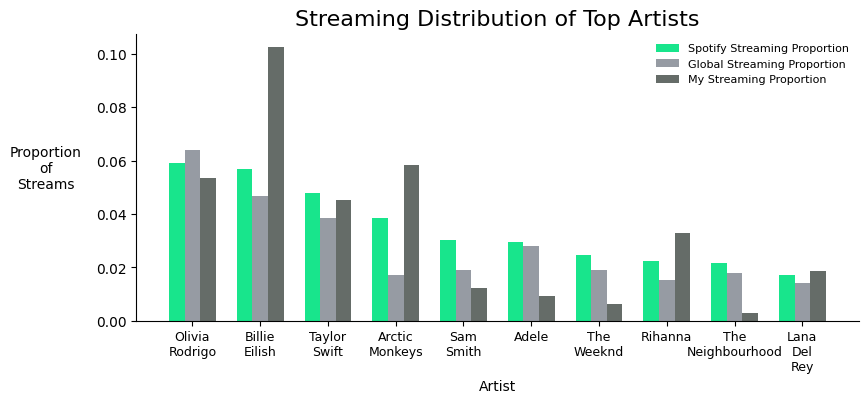

In [952]:
#want to make a bar chart illustrating artists and their discovery on spotify using my data 
#as a case study, using proportions to make the data comparable

#grab variables of interest
artist_summary = overlapd1.groupby('Artist').agg({
    'Spotify Streams': 'sum',
    'TotalStreams': 'sum',
    'StreamCount': 'sum' }).reset_index()

#and calculate proportions with them
artist_summary['SpotifyProportion'] = artist_summary['Spotify Streams'] / artist_summary['Spotify Streams'].sum() # spotify out of total streams
artist_summary['MyProportion'] = artist_summary['StreamCount'] / artist_summary['StreamCount'].sum()
artist_summary['TotalProportion'] = artist_summary['TotalStreams'] / artist_summary['TotalStreams'].sum()

#normalize data? eh not rn

#grab top 10 artists
top10 = artist_summary.sort_values('SpotifyProportion', ascending=False).head(10)

#set up bar plot, use 25% of each slot
fig, ax = plt.subplots(figsize=(9.32, 3.73))
x = np.arange(len(top10))
w = 0.23

#establish each category and color
ax.bar(x-w, top10['SpotifyProportion'],  width=w, label= 'Spotify Streaming Proportion', color='#18e58c')
ax.bar(x,   top10['TotalProportion'],  width=w, label='Global Streaming Proportion', color='#969ba3')
ax.bar(x+w, top10['MyProportion'], width=w, label='My Streaming Proportion', color='#656C68')

# colors = ['#969ba3', '#4b917d', '#c3f0c8','#18e58c']
#set up x axis
xlabs= ['Olivia\nRodrigo', 'Billie\nEilish', 'Taylor\nSwift',
       'Arctic\nMonkeys', 'Sam\nSmith', 'Adele', 'The\nWeeknd', 'Rihanna',
       'The\nNeighbourhood', 'Lana\nDel\nRey']
ax.set_xticks(x)
ax.set_xticklabels(xlabs, fontsize=9,rotation=0)

#ylab and title
ax.set_title('Streaming Distribution of Top Artists', fontsize=16)
ax.set_ylabel('Proportion\nof\nStreams', rotation=0)
ax.set_xlabel('Artist', rotation=0)


# set y label position to top right
ax.yaxis.set_label_coords(-0.125, 0.45)

#show legend
ax.legend(fontsize=8, framealpha=0)

#hide border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("top_songs.png", format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()
